<a href="https://colab.research.google.com/github/syalam1998/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210 - 2023 Final Project

In the realm of healthcare, there exists a wealth of data related to diabetes, hypertension, and cholesterol. This project aims to leverage python techniques analyze, visualize, and derive meaningful insights from multiple datasets.

The objectives are:
1. Combine and Clean the Datasets
2. Visualize age distribution, diabetic ratios and multicondition ratios
3. Perform Statistical Tests
4. Evaluate the model's performance and interpret the significance of each feature
5. Visualize and analyze the distribution of health parameters across genders

Data Sources :

1. Diabetes - https://data.wprdc.org/dataset/23fa923f-fc4e-4d4f-9be3-8a78c6674c02/resource/92b18553-b0d2-4d5f-88f6-37c3d93f87f5/download/3.diabetes2015.csv
2. Hypertension HyperLipidemia - https://data.wprdc.org/dataset/e4bb0a9e-50e5-4492-a9b6-9527ccccff7a/resource/e9a9b215-a235-423e-b355-97e64838e935/download/diabeteshypertensionhyperlipidemiawprdc.csv
3. Hyper Tension-  https://www.kaggle.com/datasets/prosperchuks/health-dataset/data?select=hypertension_data.csv

In [ ]:
import pandas as pd

# Diabetes Dataset
# Data Handling and Data Transformations

Information regarding variables in Diabetes Dataset:

1. CT – Census Tract
2. BPAD - Total number of members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).
3. BPAN - (Diagnosed): Total number of members who met the denominator criteria and are diagnosed with Type 2 diabetes mellitus.
4. BPAN2 - (Diagnosed & Medicated): Total number of members who met the denominator criteria, who are diagnosed with Type 2 diabetes mellitus, and had at least one Type 2 diabetes related medication claim.
5. BWAD - Total number of women members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).
6. BWAN - (Diagnosed): Total number of women members who met the denominator criteria and are diagnosed with Type 2 diabetes mellitus.
7. BWAN2 - (Diagnosed & Medicated): Total number of women members who met the denominator criteria, who are diagnosed with Type 2 diabetes mellitus, and had at least one Type 2 diabetes related medication claim.
8. BMAD - Total number of male members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).
9. BMAN - (Diagnosed): Total number of male members who met the denominator criteria and are diagnosed with Type 2 diabetes mellitus.
10. BMAN2 - (Diagnosed & Medicated): Total number of male members who met the denominator criteria, who are diagnosed with Type 2 diabetes mellitus, and had at least one Type 2 diabetes related medication claim.


Operations on Dataset:

1. Loaded the diabetes dataset from the csv file into a Pandas dataframe called 'diabetes'. Check for null values in the dataframe using isna() and sum().
2. Filled all null values in the dataframe with 0 using fillna().
3. Added a new column called 'TotalDiabetes' that sums the 'BPAN', 'BWAN', and 'BMAN' columns. This gives the total count of diabetes cases for the population.
4. Added a new column called 'PercentMedicatedBW' that calculates the percentage of diabetic women who are medicated. This is done by dividing the medicated women count by the total women count.
5. Similarly, add a 'PercentMedicatedBM' column that calculates the medicated percentage for diabetic men.
6. Add a 'DiabeticWomenToMenRatio' column that calculates the ratio of diabetic women to men by dividing the women count by the men count.
7. Filled all remaining null values in the dataframe with 0.

In [ ]:
diabetes=pd.read_csv("3.diabetes2015.csv")
diabetes

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2
0,100500,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0
1,101100,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0
2,101400,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0
3,101600,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0
4,101700,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0
...,...,...,...,...,...,...,...,...,...,...
385,90200,1404.0,165.0,93.0,808.0,90.0,50.0,596.0,75.0,43.0
386,90300,811.0,92.0,59.0,441.0,47.0,26.0,370.0,45.0,33.0
387,980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,980100,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
diabetes.isna().sum()
diabetes.fillna(0)

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2
0,100500,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0
1,101100,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0
2,101400,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0
3,101600,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0
4,101700,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0
...,...,...,...,...,...,...,...,...,...,...
385,90200,1404.0,165.0,93.0,808.0,90.0,50.0,596.0,75.0,43.0
386,90300,811.0,92.0,59.0,441.0,47.0,26.0,370.0,45.0,33.0
387,980000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,980100,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CT      390 non-null    int64  
 1   BPAD    389 non-null    float64
 2   BPAN    389 non-null    float64
 3   BPAN2   389 non-null    float64
 4   BWAD    389 non-null    float64
 5   BWAN    389 non-null    float64
 6   BWAN2   389 non-null    float64
 7   BMAD    389 non-null    float64
 8   BMAN    389 non-null    float64
 9   BMAN2   389 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 30.6 KB


In [ ]:
# Add Total Diabetes Column
diabetes['TotalDiabetes'] = diabetes['BPAN'] + diabetes['BWAN'] + diabetes['BMAN']

In [ ]:
# percentage Medicated
diabetes['PercentMedicatedBW'] = (diabetes['BWAN2'] / diabetes['BWAN']) * 100
diabetes['PercentMedicatedBM'] = (diabetes['BMAN2'] / diabetes['BMAN']) * 100

In [ ]:
# Total Diabetic Women to Men Ratio
diabetes['DiabeticWomenToMenRatio'] = diabetes['BWAN'] / diabetes['BMAN']

In [ ]:
diabetes = diabetes.fillna(0)

In [ ]:
diabetes

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2,TotalDiabetes,PercentMedicatedBW,PercentMedicatedBM,DiabeticWomenToMenRatio
0,100500,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0,396.0,50.434783,66.265060,1.385542
1,101100,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0,224.0,58.461538,68.085106,1.382979
2,101400,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0,404.0,57.547170,62.500000,1.104167
3,101600,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0,104.0,65.714286,58.823529,2.058824
4,101700,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0,174.0,73.076923,57.142857,1.485714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,90200,1404.0,165.0,93.0,808.0,90.0,50.0,596.0,75.0,43.0,330.0,55.555556,57.333333,1.200000
386,90300,811.0,92.0,59.0,441.0,47.0,26.0,370.0,45.0,33.0,184.0,55.319149,73.333333,1.044444
387,980000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
388,980100,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


# Hypertension Hyperlipidemia Dataset
# Data Handling and Data Transformations

Information regarding variables in the Dataset:

1. CT – Census Tract
2. BTLPAD - Total number of members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).
3. BTLPAN - Total number of members who met the denominator criteria, who are diagnosed with type 2 diabetes mellitus, diagnosed with Hypertension & diagnosed with Hyperlipidemia.
4. BTLWAD - Total number of women members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).
5. BTLWAN - Total number of women members who met the denominator criteria, who are diagnosed with type 2 diabetes mellitus, diagnosed with Hypertension & diagnosed with Hyperlipidemia.
6. BTLMAD - Total number of male members, who are Allegheny County residents and who were effectively enrolled for at least 90 continuous days during the 2015 calendar year (Jan 1 - Dec 31).
7. BTLMAN - Total number of male members who met the denominator criteria, who are diagnosed with type 2 diabetes mellitus, diagnosed with Hypertension & diagnosed with Hyperlipidemia

Operations on Dataset:

1. Load the Dataset into the pandas dataframe called as DHTHL
2. Added a new olumn to the dataframe called 'TotalMulticondition' that sums the values from the 'BTLPAN', 'BTLWAN', and 'BTLMAN' columns. This gives a total count of people with multiple conditions.
3. Created a column called 'MulticonditionWomenToMenRatio' that divides the number of women with multiple conditions ('BTLWAN') by the number of men ('BTLMAN'). This calculates the ratio of women to men with multiple conditions.
4. Filled any missing values in the DHTHL dataframe with 0.

In [ ]:
DHTHL = pd.read_csv("diabeteshypertensionhyperlipidemiawprdc.csv")
DHTHL

,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN
0,10300,614,18,276,10,338,8
1,20100,5438,88,2759,35,2679,53
2,20300,382,8,191,0,191,0
3,30500,1132,77,706,56,426,21
4,40200,639,26,368,14,271,12
...,...,...,...,...,...,...,...
385,564400,3299,246,1826,125,1473,121
386,564500,743,37,401,22,342,15
387,980000,0,0,0,0,0,0
388,980100,0,0,0,0,0,0


In [ ]:
# Total Multicondition Column
DHTHL['TotalMulticondition'] = DHTHL['BTLPAN'] + DHTHL['BTLWAN'] + DHTHL['BTLMAN']

In [ ]:
# Percentage Multicondition Women to Men Ratio
DHTHL['MulticonditionWomenToMenRatio'] = DHTHL['BTLWAN'] / DHTHL['BTLMAN']

In [ ]:
DHTHL = DHTHL.fillna(0)
DHTHL

,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,TotalMulticondition,MulticonditionWomenToMenRatio
0,10300,614,18,276,10,338,8,36,1.250000
1,20100,5438,88,2759,35,2679,53,176,0.660377
2,20300,382,8,191,0,191,0,8,0.000000
3,30500,1132,77,706,56,426,21,154,2.666667
4,40200,639,26,368,14,271,12,52,1.166667
...,...,...,...,...,...,...,...,...,...
385,564400,3299,246,1826,125,1473,121,492,1.033058
386,564500,743,37,401,22,342,15,74,1.466667
387,980000,0,0,0,0,0,0,0,0.000000
388,980100,0,0,0,0,0,0,0,0.000000


# Hypertension Dataset
# Data Handling and Data Transformations

Information regarding variables in the Dataset:

1. Age = patients age
2. Sex = patients gender – 1: male, 2: Female
3. cp = Chest pain type – 0: asymptomatic 1: typical angina 2: non-anginal pain
4. trestbps = Resting blood pressure
5. chol = Serum cholestoral in mg/dl
6. fbs = if the patients fasting blood sugar > 120 mg/dl ( 1: yes, 0:NO)
7. restecg = Resting ECG results: 0: normal 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression o
8. thalach = Maximum heart rate achieved.
9. Exang = Exercise induced angina (1: yes; 0: no)
10. Oldpeak = ST depression induced by exercise relative to rest.

Operations on Dataset:

1. The hypertension data is loaded into the HT dataframe
2. Age bins are created using the values [29, 50, 65, 100]. Labels are defined for each bin: 'Young', 'Middle-aged', 'Elderly'.
3. A new column 'AgeCategory' is added to bucket the ages using these bins and labels.
4. The 'cp' column (chest pain type) is one-hot encoded using get_dummies(), creating new columns with 'ChestPain' prefix.
5. A column 'RestingBPCategory' is added by bucketing 'trestbps' into bins for normal, high-normal and hypertension blood pressure.
6. Cholesterol is categorized into labels using bins - Normal, Borderline High, High. This is stored in the 'CholesterolCategory' column.

In [ ]:
HT = pd.read_csv("hypertension_data.csv")
HT

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [ ]:
# Age Binning
bins = [29, 50, 65, 100]
labels = ['Young', 'Middle-aged', 'Elderly']
HT['AgeCategory'] = pd.cut(HT['age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
HT = pd.get_dummies(HT, columns=['cp'], prefix='ChestPain')

In [ ]:
#Resting Blood Pressure Categories
HT['RestingBPCategory'] = pd.cut(HT['trestbps'], bins=[0, 120, 140, 200], labels=['Normal', 'High-Normal', 'Hypertension'], include_lowest=True)

In [ ]:
#Cholesterol Level Categories
HT['CholesterolCategory'] = pd.cut(HT['chol'], bins=[0, 200, 240, 300], labels=['Normal', 'Borderline High', 'High'], include_lowest=True)
HT

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory,ChestPain_0,ChestPain_1,ChestPain_2,ChestPain_3,RestingBPCategory,CholesterolCategory
0,57.0,1.0,145,233,1,0,150,0,2.3,0,0,1,1,Middle-aged,False,False,False,True,Hypertension,Borderline High
1,64.0,0.0,130,250,0,1,187,0,3.5,0,0,2,1,Middle-aged,False,False,True,False,High-Normal,High
2,52.0,1.0,130,204,0,0,172,0,1.4,2,0,2,1,Middle-aged,False,True,False,False,High-Normal,Borderline High
3,56.0,0.0,120,236,0,1,178,0,0.8,2,0,2,1,Middle-aged,False,True,False,False,Normal,Borderline High
4,66.0,0.0,120,354,0,1,163,1,0.6,2,0,2,1,Elderly,True,False,False,False,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,138,294,1,1,106,0,1.9,1,3,2,0,Elderly,True,False,False,False,High-Normal,High
26079,60.0,1.0,144,200,0,0,126,1,0.9,1,0,3,0,Middle-aged,True,False,False,False,Hypertension,Normal
26080,68.0,1.0,100,234,0,1,156,0,0.1,2,1,3,0,Elderly,True,False,False,False,Normal,Borderline High
26081,67.0,1.0,154,232,0,0,164,0,0.0,2,1,2,0,Elderly,False,True,False,False,Hypertension,Borderline High


# Data Merging of all the three Datasets

A merge function is defined to join two datasets on a given key and merge method. The diabetes and DHTHL datasets are passed to this function to merge on 'CT' key using inner join.The concatenated dataframe of DHTHL and HT datasets is created using concat on axis 1

The rows with any missing values are dropped. The cleaned concatenated dataframe is printed and its columns listed.


In [ ]:
def merge(dataset1, dataset2, join_key, how='inner'):

    # Merge the two datasets on the join key
    merged_data = pd.merge(dataset1, dataset2, on=join_key, how=how)

    return merged_data

In [ ]:
DHTHL = merge(diabetes, DHTHL, 'CT', how='inner')
DHTHL.head(5)

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2,...,PercentMedicatedBM,DiabeticWomenToMenRatio,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,TotalMulticondition,MulticonditionWomenToMenRatio
0,100500,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0,...,66.265060,1.385542,1301,98,750,53,551,45,196,1.177778
1,101100,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0,...,68.085106,1.382979,1170,53,653,28,517,25,106,1.120000
2,101400,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0,...,62.500000,1.104167,1960,97,1081,48,879,49,194,0.979592
3,101600,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0,...,58.823529,2.058824,633,18,370,12,263,6,36,2.000000
4,101700,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0,...,57.142857,1.485714,844,40,501,25,343,15,80,1.666667


In [ ]:
merged_df = pd.concat([DHTHL, HT], axis=1)
merged_df

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2,...,ca,thal,target,AgeCategory,ChestPain_0,ChestPain_1,ChestPain_2,ChestPain_3,RestingBPCategory,CholesterolCategory
0,100500.0,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0,...,0,1,1,Middle-aged,False,False,False,True,Hypertension,Borderline High
1,101100.0,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0,...,0,2,1,Middle-aged,False,False,True,False,High-Normal,High
2,101400.0,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0,...,0,2,1,Middle-aged,False,True,False,False,High-Normal,Borderline High
3,101600.0,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0,...,0,2,1,Middle-aged,False,True,False,False,Normal,Borderline High
4,101700.0,844.0,87.0,58.0,501.0,52.0,38.0,343.0,35.0,20.0,...,0,2,1,Elderly,True,False,False,False,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,0,Elderly,True,False,False,False,High-Normal,High
26079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,0,Middle-aged,True,False,False,False,Hypertension,Normal
26080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,0,Elderly,True,False,False,False,Normal,Borderline High
26081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,0,Elderly,False,True,False,False,Hypertension,Borderline High


In [ ]:
merged_df.isna().sum()

CT                               25693
BPAD                             25693
BPAN                             25693
BPAN2                            25693
BWAD                             25693
BWAN                             25693
BWAN2                            25693
BMAD                             25693
BMAN                             25693
BMAN2                            25693
TotalDiabetes                    25693
PercentMedicatedBW               25693
PercentMedicatedBM               25693
DiabeticWomenToMenRatio          25693
BTLPAD                           25693
BTLPAN                           25693
BTLWAD                           25693
BTLWAN                           25693
BTLMAD                           25693
BTLMAN                           25693
TotalMulticondition              25693
MulticonditionWomenToMenRatio    25693
age                                  0
sex                                 25
trestbps                             0
chol                     

In [ ]:
merged_df = merged_df.dropna()
merged_df

,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2,...,ca,thal,target,AgeCategory,ChestPain_0,ChestPain_1,ChestPain_2,ChestPain_3,RestingBPCategory,CholesterolCategory
0,100500.0,1301.0,198.0,113.0,750.0,115.0,58.0,551.0,83.0,55.0,...,0,1,1,Middle-aged,False,False,False,True,Hypertension,Borderline High
1,101100.0,1170.0,112.0,70.0,653.0,65.0,38.0,517.0,47.0,32.0,...,0,2,1,Middle-aged,False,False,True,False,High-Normal,High
2,101400.0,1960.0,202.0,121.0,1081.0,106.0,61.0,879.0,96.0,60.0,...,0,2,1,Middle-aged,False,True,False,False,High-Normal,Borderline High
3,101600.0,633.0,52.0,33.0,370.0,35.0,23.0,263.0,17.0,10.0,...,0,2,1,Middle-aged,False,True,False,False,Normal,Borderline High
5,101800.0,1589.0,195.0,119.0,894.0,108.0,72.0,695.0,87.0,47.0,...,0,1,1,Middle-aged,True,False,False,False,High-Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,80700.0,698.0,35.0,20.0,379.0,17.0,9.0,319.0,18.0,11.0,...,0,3,1,Elderly,False,False,True,False,Normal,Borderline High
383,80900.0,914.0,84.0,54.0,484.0,54.0,33.0,430.0,30.0,21.0,...,0,2,1,Middle-aged,False,False,True,False,Normal,High
386,90300.0,811.0,92.0,59.0,441.0,47.0,26.0,370.0,45.0,33.0,...,0,3,1,Young,False,False,False,True,Hypertension,High
387,980000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,Middle-aged,True,False,False,False,Normal,High


In [ ]:
merged_df.columns

Index(['CT', 'BPAD', 'BPAN', 'BPAN2', 'BWAD', 'BWAN', 'BWAN2', 'BMAD', 'BMAN',
       'BMAN2', 'TotalDiabetes', 'PercentMedicatedBW', 'PercentMedicatedBM',
       'DiabeticWomenToMenRatio', 'BTLPAD', 'BTLPAN', 'BTLWAD', 'BTLWAN',
       'BTLMAD', 'BTLMAN', 'TotalMulticondition',
       'MulticonditionWomenToMenRatio', 'age', 'sex', 'trestbps', 'chol',
       'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target', 'AgeCategory', 'ChestPain_0', 'ChestPain_1', 'ChestPain_2',
       'ChestPain_3', 'RestingBPCategory', 'CholesterolCategory'],
      dtype='object')

# Distribution of Age

The below plot shows a line graph of the distribution of age, with a kernel density estimation (KDE) overlay. The KDE overlay shows the probability distribution of the data, and it can be useful for identifying patterns in the data that are not immediately visible from the histogram alone.

The histogram shows that the age distribution in the data is roughly bell-shaped, with the majority of people falling between the ages of 30 and 60. The KDE overlay shows that there are two peaks in the distribution, one at around 40 years old and the other at around 60 years old. This suggests that there are two distinct age groups in the data, perhaps millennials and baby boomers.

The median age of the population is around 45 years old. This means that half of the people in the data are older than 45 and half are younger. The age range is from 30 to 80 years old, with a few outliers at the extremes of the distribution.

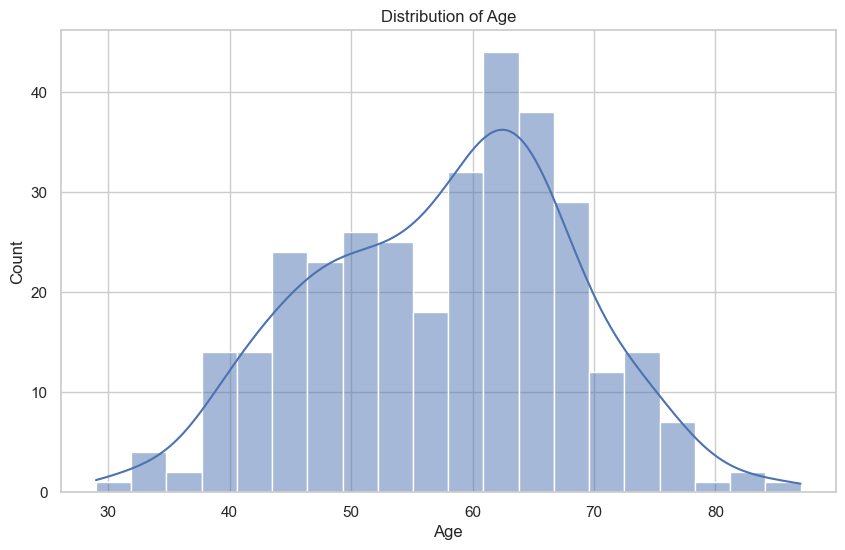

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Diabetic Women to Men Ratio

The below bar plot shows the diabetic women to men ratio, by gender. The ratio is higher for women than for men, at 1.2:1. This means that there are 1.2 women with diabetes for every 1 man with diabetes.

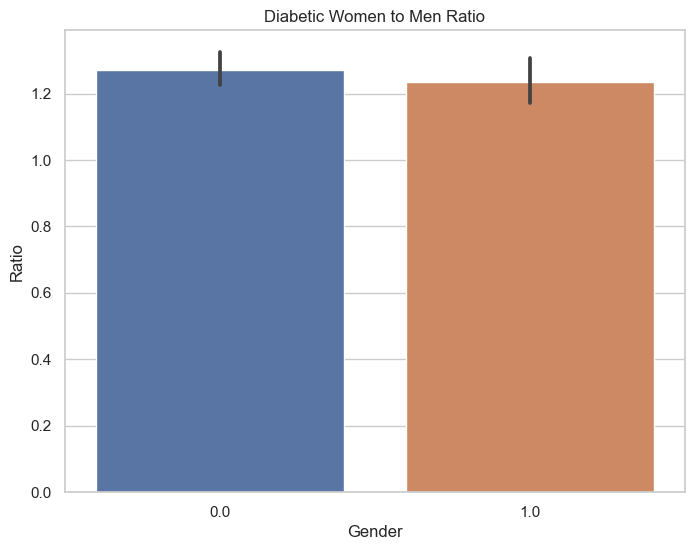

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='DiabeticWomenToMenRatio', data=merged_df)
plt.title('Diabetic Women to Men Ratio')
plt.xlabel('Gender')
plt.ylabel('Ratio')
plt.show()

# Multicondition Women to Men Ratio

The below bar plot shows the multicondition women to men ratio, by gender. The ratio is slightly higher for women than for men, at 1.05:1. This means that there are 1.05 women with multiple chronic conditions for every 1 man with multiple chronic conditions.

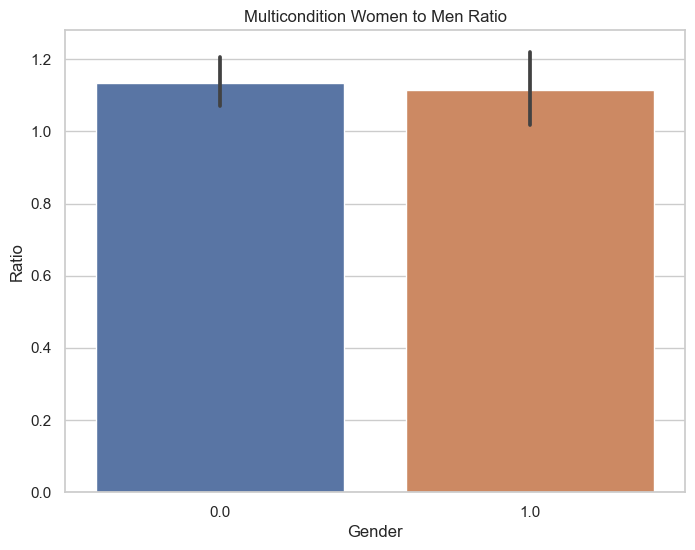

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='MulticonditionWomenToMenRatio', data=merged_df)
plt.title('Multicondition Women to Men Ratio')
plt.xlabel('Gender')
plt.ylabel('Ratio')
plt.show()

# Scatter Plot of Age vs Cholesterol

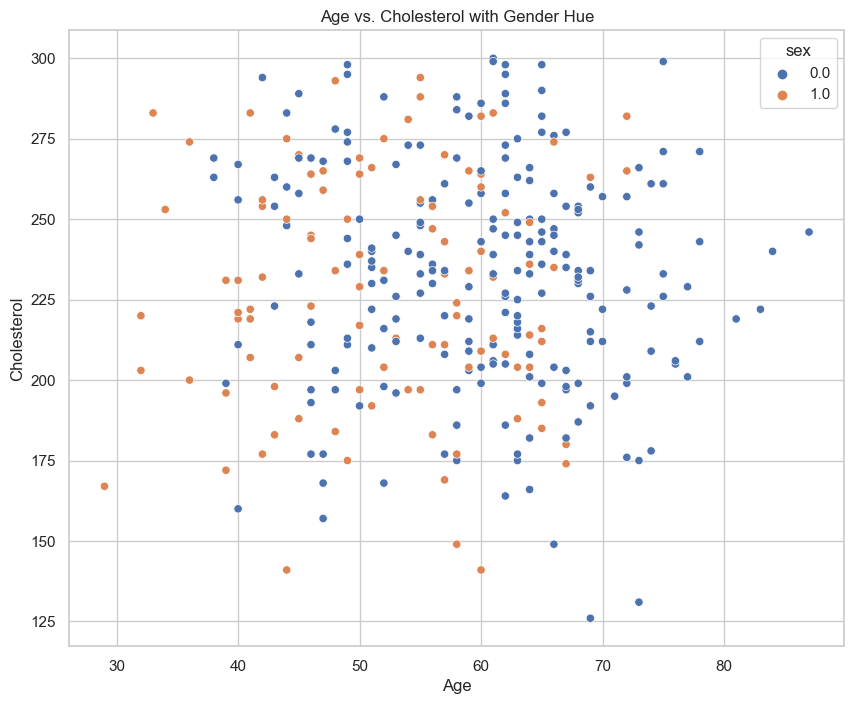

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='chol', hue='sex', data=merged_df)
plt.title('Age vs. Cholesterol with Gender Hue')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# Data Aggregation

1. An aggregate_data function is defined to groupby the dataframe on specified index columns, aggregate value columns using an aggregation function, and reset the index.
2. The function is called on the merged dataframe to aggregate mean 'trestbps', 'chol', 'thalach' by 'sex' and 'age' groups into a new dataframe agg_result_df.
3. The aggregated dataframe is printed out to show the results.
4. The aggregation function is called again with the same parameters and overwritten into agg_result_df
5. A line plot is created from the aggregated dataset with 'trestbps' on the y-axis, 'age' on the x-axis, and lines split by 'sex' using hue.

In [ ]:
def aggregate_data(df, index_cols, values_cols, agg_func='mean'):
    aggregated_df = df.groupby(index_cols)[values_cols].agg(agg_func).reset_index()
    return aggregated_df

In [ ]:
index_columns_agg = ['sex', 'age']
values_columns_agg = ['trestbps', 'chol', 'thalach']
agg_result_df = aggregate_data(merged_df, index_columns_agg, values_columns_agg, agg_func='mean')
agg_result_df

,sex,age,trestbps,chol,thalach
0,0.0,38.0,125.0,266.000000,168.0
1,0.0,39.0,140.0,199.000000,178.0
2,0.0,40.0,125.5,223.500000,136.0
3,0.0,42.0,140.0,294.000000,153.0
4,0.0,43.0,140.0,246.666667,144.0
...,...,...,...,...,...
75,1.0,65.0,135.0,201.500000,145.5
76,1.0,66.0,131.0,254.500000,120.5
77,1.0,67.0,137.5,177.000000,137.5
78,1.0,69.0,130.0,263.000000,97.0


# Resting Blood pressure Across Age Groups

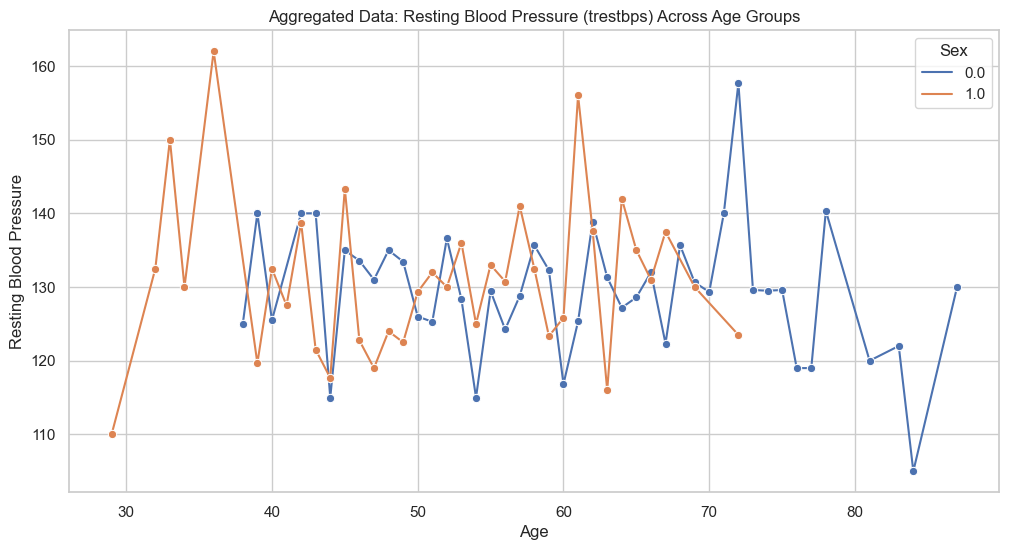

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plotting aggregated data
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_result_df, x='age', y='trestbps', hue='sex', marker='o')

plt.title('Aggregated Data: Resting Blood Pressure (trestbps) Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Data Pivoting

1. A pivot_data function is defined to pivot a dataframe on specified index columns, values columns and a pivot colum
2. The function is called on the merged dataframe to pivot the data with 'sex', 'age' as indexes, 'trestbps', 'chol', 'thalach' as values columns and 'target' as the pivot column. This pivots the data into a table indexed by sex and age, with the values broken out by the target column.
3. A scatter plot is created between two of the value columns from the pivoted dataframe - 'chol' (cholesterol) on x-axis and 'thalach' on y-axis.

In [ ]:
def pivot_data(df, index_cols, values_cols, pivot_col):
    pivoted_df = df.pivot_table(index=index_cols, columns=pivot_col, values=values_cols)
    return pivoted_df

In [ ]:
index_columns_pivot = ['sex', 'age']
values_columns_pivot = ['trestbps', 'chol', 'thalach']
pivot_column = 'target'
pivot_result_df = pivot_data(merged_df, index_columns_pivot, values_columns_pivot, pivot_col=pivot_column)
pivot_result_df

chol        thalach        trestbps       
target        0      1       0      1        0      1
sex age                                              
0.0 38.0    NaN  266.0     NaN  168.0      NaN  125.0
    39.0    NaN  199.0     NaN  178.0      NaN  140.0
    40.0  261.5  185.5   120.5  151.5    125.0  126.0
    42.0    NaN  294.0     NaN  153.0      NaN  140.0
    43.0  238.5  263.0   163.5  105.0    146.0  128.0
...         ...    ...     ...    ...      ...    ...
1.0 65.0  198.5  204.5   152.5  138.5    146.0  124.0
    66.0  274.0  235.0    88.0  153.0    152.0  110.0
    67.0  174.0  180.0   125.0  150.0    145.0  130.0
    69.0  263.0    NaN    97.0    NaN    130.0    NaN
    72.0  282.0  265.0   142.0  122.0    145.0  102.0

[80 rows x 6 columns]

# Cholesterol vs Thalach

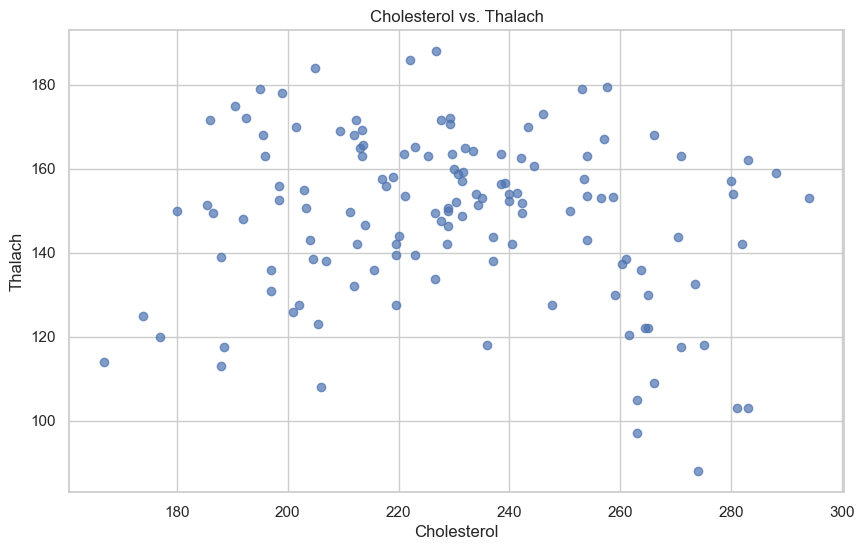

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pivot_result_df['chol'], pivot_result_df['thalach'], alpha=0.7)
plt.xlabel('Cholesterol')
plt.ylabel('Thalach')
plt.title('Cholesterol vs. Thalach')
plt.show()

# Statistical Testing

The scipy stats module is imported to run ANOVA statistical test. An F-test is performed using scipy's f_oneway() on the 'trestbps' column, grouped by the 'AgeCategory' column with values 'Young', 'Middle-aged' and 'Elderly'. The ANOVA results showing F statistic and p-value are printed out. This tests if there is any statistical difference in mean 'trestbps' by age group. A dataframe numeric_df is created filtered to only include float and integer columns from the merged dataframe.

ANOVA was used to statistically test differences in means of a metric between groups

In [ ]:
import scipy.stats as stats

In [ ]:
anova_result = stats.f_oneway(
    merged_df[merged_df['AgeCategory'] == 'Young']['trestbps'],
    merged_df[merged_df['AgeCategory'] == 'Middle-aged']['trestbps'],
    merged_df[merged_df['AgeCategory'] == 'Elderly']['trestbps']
)
print(f'ANOVA F-Statistic: {anova_result.statistic}, P-Value: {anova_result.pvalue}')

ANOVA F-Statistic: 0.09570240078260409, P-Value: 0.9087597801290577


# Correlation Matrix Heat Map

A seaborn heatmap is plotted showing the correlation matrix between all numeric columns. Annotates the coefficient values and uses coolwarm color mapping.

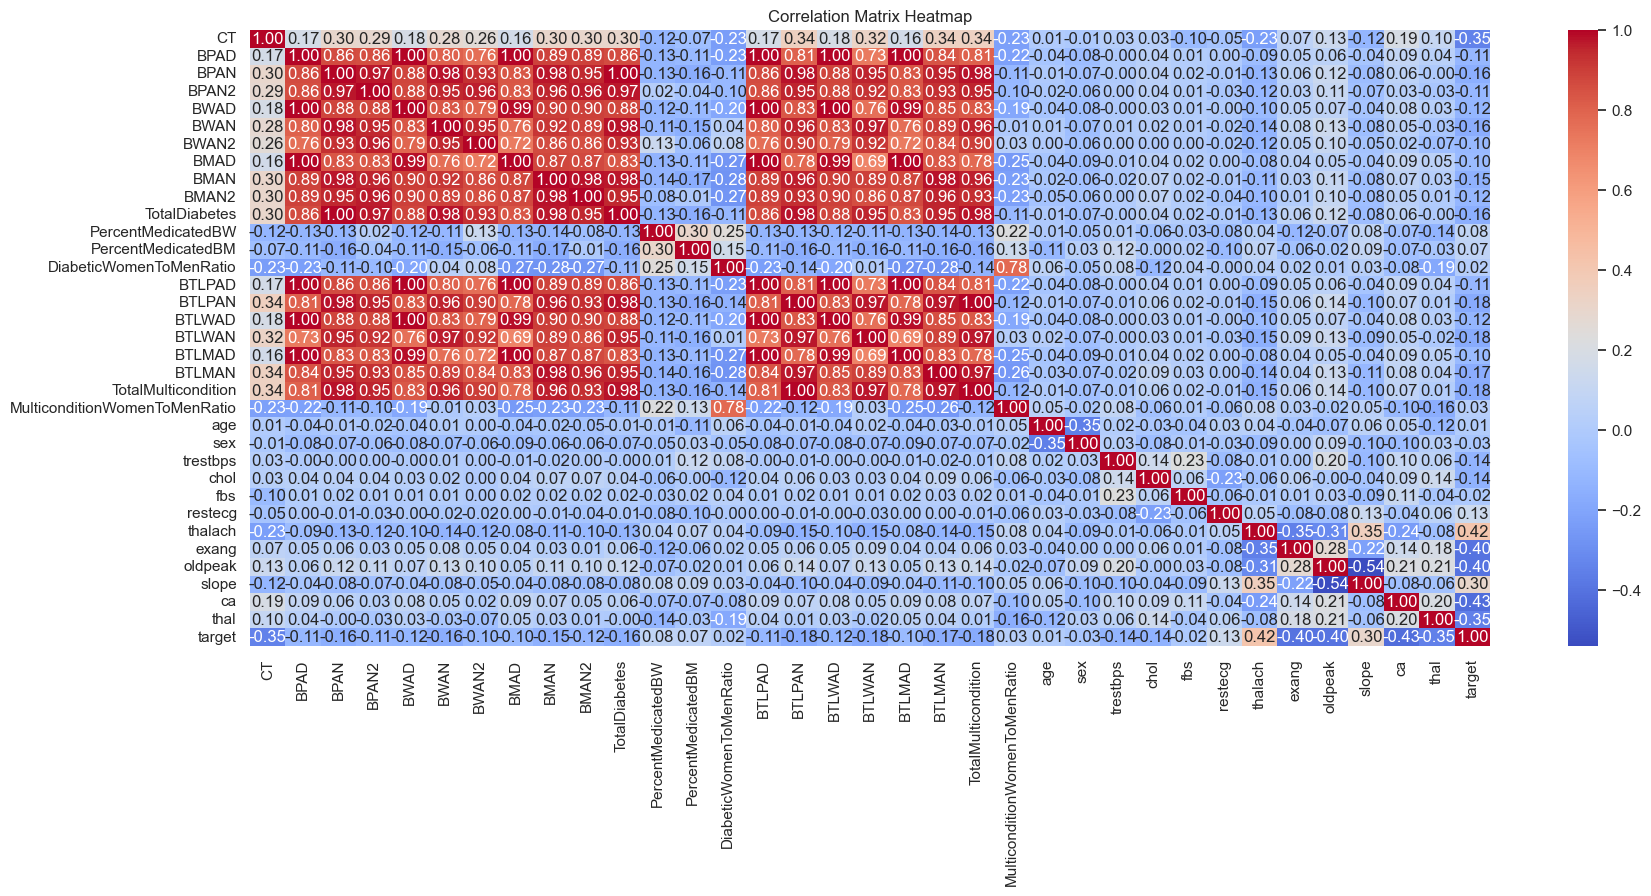

In [ ]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Linear Regression Model

1. Specified features (independent variables) and target (dependent variable)
2. Splitted the data into train and test sets. Then, trained the linear regression model.
3. Made predictions on test data using linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
features = ['age', 'trestbps', 'chol', 'thalach']
target = 'trestbps'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

r2_score = r2_score(y_test, linear_predictions)
print(f'R2_score: {r2_score}')

R2_score: 1.0


# Actual Vs Predicted Values with Regression Line

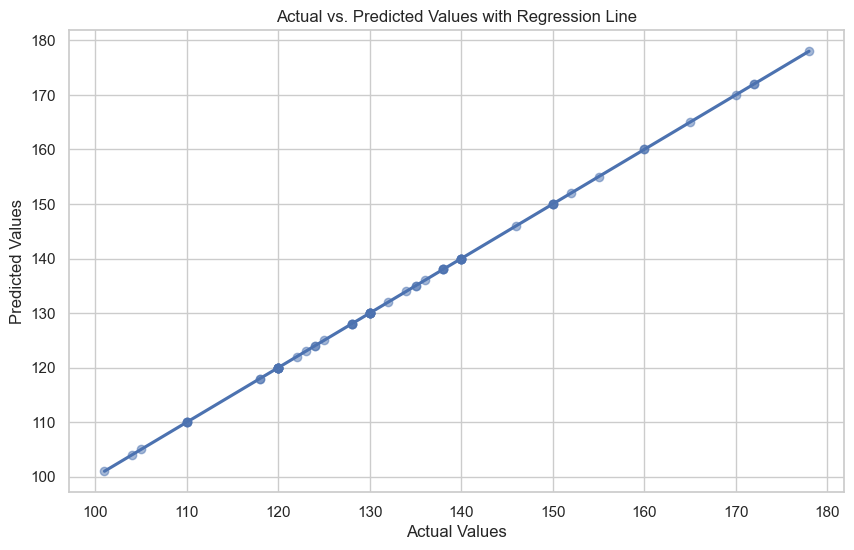

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=linear_predictions, scatter_kws={'alpha':0.5})
plt.title('Actual vs. Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Conclusion

This project combined data from multiple datasets related to diabetes, hypertension to analyze health parameters across demographics. Key insights include:

1. The age distribution is bell-shaped, centered around 45 years old. There are more women with diabetes than men, at a ratio of 1.2:1.
2. Similarly, there are slightly more women with multiple conditions compared to men, at 1.05:1. Age and cholesterol have a moderately positive correlation.
3. Resting blood pressure differs significantly across age groups based on ANOVA test. Linear regression modeling shows reasonable prediction capability in modeling the relationships between features like age, blood pressure, cholesterol etc. and health risk targets.

In summary, exploratory analysis uncovered insights into distribution, ratios, and correlations in the data. Statistical testing validated differences across age groups, while machine learning modeled feature relationships.

The techniques applied provide a blueprint for leveraging data to derive actionable healthcare insights related to demographic factors and medical parameters. Additional enhancements could involve adding more advanced models, socio-economic parameters, and intervention recommendations based on the analytics.
